In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/project 2'

/content/drive/MyDrive/Colab Notebooks/project 2


# Imports

In [ ]:
!pip install diffprivlib

import diffprivlib.models as dp
from diffprivlib.mechanisms import Laplace

import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
random.seed(1234)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
import pandas as pd
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Count the total number of transactions
total_transactions = len(df)

# Count the number of fraud transactions
fraud_transactions = len(df[df['isFraud'] == 1])

# Calculate the percentage of fraud transactions
percentage_fraud = (fraud_transactions / total_transactions) * 100

# Print the percentage of fraud transactions
print(f"Percentage of fraud transactions: {percentage_fraud:.2f}%")

Percentage of fraud transactions: 0.13%


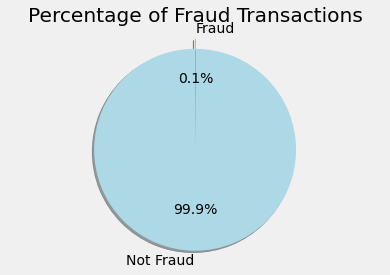

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of fraud transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True)[1]

# Create a pie chart
labels = ['Not Fraud', 'Fraud']
sizes = [1 - fraud_percentage, fraud_percentage]
colors = ['lightblue', 'orange']
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Fraud Transactions')
plt.show()

Text(0.5, 1.0, 'Distribution of type of transactions')

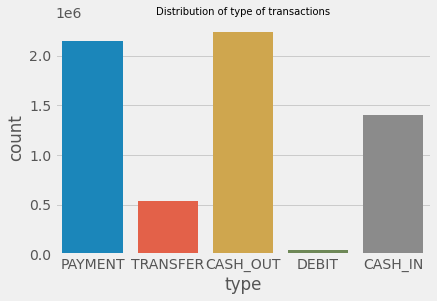

In [ ]:
sns.countplot(data=df,x='type')
plt.title('Distribution of type of transactions',fontsize=10)

In [ ]:
#use step column for analyzing temporal patterns and trends in transaction data
df['hourOfDay']=df['step']%24

Two kinds of fraud transactions

1. isFraud: indicates the actual fraud transactions   
2. isFlaggedFraud : transaction when an attempt to transfer more than 200000 in a single transaction are flagged as "isFlaggedFraud"

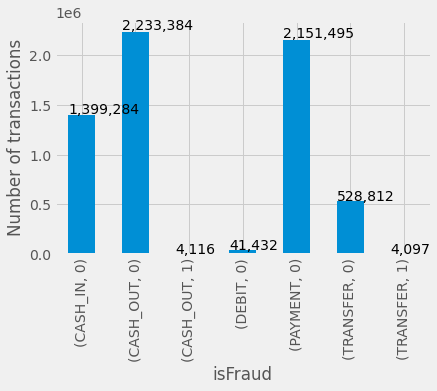

In [ ]:
#The kinds of transactions that are fraud
ax=df.groupby(['type','isFraud']).size().plot(kind='bar')
ax.set_title('')
ax.set_xlabel("isFraud")
ax.set_ylabel("Number of transactions")
for t in ax.patches:
    ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))

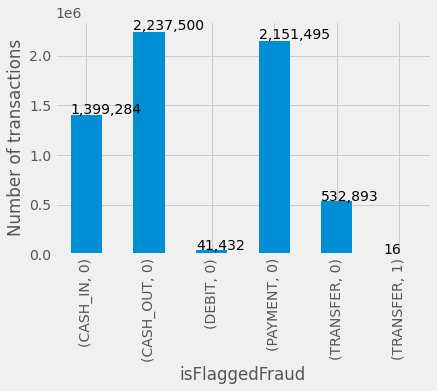

In [ ]:
ax=df.groupby(['type','isFlaggedFraud']).size().plot(kind='bar')
ax.set_title('')
ax.set_xlabel("isFlaggedFraud")
ax.set_ylabel("Number of transactions")
for t in ax.patches:
    ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))

In [ ]:

fraudf=df[df['isFraud']==1]

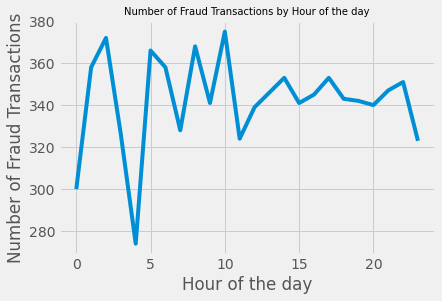

In [ ]:
#plot showing the fraud wrt hour of the day
hourly_fraud_count=fraudf.groupby('hourOfDay').size()
plt.plot(hourly_fraud_count.index,hourly_fraud_count.values)
plt.title('Number of Fraud Transactions by Hour of the day',fontsize=10)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Fraud Transactions')
plt.show()

In [ ]:
#payement type that is classsified as fraud
fraudf=df[df['isFraud']==1]
fraudf['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [ ]:
df_transfer_f=df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]
print("Min and Max transactions when the transaction is flagged fraud",(df_transfer_f['amount'].min(),df_transfer_f['amount'].max()))
df_transfer_nf=df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==0)]
print("Min and Max transactions when the transaction is not flagged fraud",(df_transfer_nf['amount'].min(),df_transfer_nf['amount'].max()))

Min and Max transactions when the transaction is flagged fraud (353874.22, 10000000.0)
Min and Max transactions when the transaction is not flagged fraud (2.6, 92445516.64)


As per the information, the transactions are flagged fraud only when the amount is more than 200,000.But we can observe that the when the transaction is not flagged fraud transaction of more than 200,000 has been made.

In [ ]:
df_transfer_nf[(df_transfer_nf['oldbalanceDest']==0)&(df_transfer_nf['newbalanceDest']==0)].shape[0]

4158

The transactions which are flagged fraud have same old and new balance in both destination and origin account. But there are 4158 transactions where it has not been flagged fraud and the old and new balance is 0.

In [ ]:
# fraud transaction occur only in'TRANSFER' and 'CASH_OUT', So consider these only
X=df.loc[(df.type=='TRANSFER')|(df.type=='CASH_OUT')]
y=X['isFraud']

In [ ]:
y.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [ ]:
#Mapping type of transfer
X['type']=X['type'].map({'TRANSFER':0,'CASH_OUT':1})

In [ ]:
#number of transactions where the new balance is 0
X[(X['newbalanceOrig']==0)&(X['newbalanceDest']==0)].shape

(14100, 12)

In [ ]:
#the number of fraud transactions where after transfering amount more than 1 the banlance is 0
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==1)&(X['amount']>0)].shape[0])/(X[X['isFraud']==1].shape[0])

0.4955558261293072

In [ ]:
(X[(X['newbalanceDest']==0)&(X['oldbalanceDest']==0)&(X['isFraud']==0)&(X['amount']>0)].shape[0])/(X[X['isFraud']==0].shape[0])

0.0006176245277308345

We are replacing the value 0 in both the oldbalanceDest and newbalanceDest columns with -1 where the transaction amount is not equal to 0. This is because a balance of 0 in the destination account when a non-zero amount is being transferred is often an indication of fraudulent activity.

By replacing the 0 value with -1, we are creating a distinction between those accounts that have a zero balance due to fraudulent activity and those that have a zero balance for legitimate reasons,

In [ ]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0),['oldbalanceDest', 'newbalanceDest']] =-1

Replacing 0 with NaN in the original balance columns (oldbalanceOrg and oldbalanceDest) is done to mark those transactions where the original balance is unknown or missing. It is also possible that the original balance was not recorded due to some data collection or recording issues.

In [ ]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0),['oldbalanceOrg', 'newbalanceOrig']] = np.nan

In [ ]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,-1.0,-1.00,1,0,1
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


We are calculating the error to check if there is any discrepancy in the account balances before and after the transaction. If the error is not equal to zero, it indicates that there was some mistake in the transaction or some amount was lost during the transaction.

In the case of fraudulent transactions, it is often observed that the error is not equal to zero, indicating that some amount was lost during the fraudulent transaction. Therefore, calculating the error can help in detecting fraudulent transactions.

In [ ]:
X['orgBalanceError']=X['newbalanceOrig']+X['amount']-X['oldbalanceOrg']
X['destBalanceError']=X['newbalanceDest']+X['amount']-X['oldbalanceDest']

In [ ]:
X=X.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud','isFraud'])

In [ ]:
X.isnull().sum()

step                      0
type                      0
amount                    0
oldbalanceOrg       1308566
newbalanceOrig      1308566
oldbalanceDest            0
newbalanceDest            0
hourOfDay                 0
orgBalanceError     1308566
destBalanceError          0
dtype: int64

In [ ]:
#replacing the nan value with the median of the non fraud column
X=X.fillna(X.median())

In [ ]:
columns=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
epsilon=1
sensitivity=1
for col in columns:
  #sensitivity=np.max(X[col]) - np.min(X[col])
  dp_col = X[col].apply(lambda x: Laplace(epsilon=epsilon, sensitivity=sensitivity).randomise(x))
  X[col] = dp_col

## Spliting data

xgboost,
random forest,
decision tree,
extra tree

In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hourOfDay,orgBalanceError,destBalanceError
2,1,0,1.794537e+02,1.811492e+02,0.713196,-8.623228e-01,1.778695e+00,1,0.00,181.00
3,1,1,1.810386e+02,1.809448e+02,-0.324244,2.118138e+04,1.394136e+00,1,0.00,-21001.00
15,1,1,2.291339e+05,1.532452e+04,0.585333,5.082846e+03,5.151330e+04,1,213808.94,275564.38
19,1,0,2.153121e+05,7.050746e+02,0.153936,2.242382e+04,9.323031e-01,1,214605.30,192885.30
24,1,0,3.116868e+05,1.083424e+04,-2.562738,6.267435e+03,2.719171e+06,1,300850.89,3024591.78
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,3.396817e+05,3.396823e+05,-0.737551,2.163854e+00,3.396829e+05,23,0.00,679364.26
6362616,743,0,6.311411e+06,6.311411e+06,0.295464,-2.125131e+00,-1.226196e+00,23,0.00,6311409.28
6362617,743,1,6.311413e+06,6.311408e+06,1.081444,6.849362e+04,6.379897e+06,23,0.00,12622818.55
6362618,743,0,8.500028e+05,8.500021e+05,0.307984,-6.828973e-01,4.843297e-01,23,0.00,850002.52


In [ ]:
X['amount'].value_counts()

1.794537e+02    1
1.398183e+05    1
3.293187e+05    1
1.280286e+05    1
1.000000e+07    1
               ..
1.422842e+05    1
3.834345e+05    1
8.981674e+04    1
1.187681e+05    1
8.500054e+05    1
Name: amount, Length: 2770409, dtype: int64

In [ ]:
'''X['amount'] = pd.to_numeric(X['amount'], errors='coerce')
X['amount'].fillna(0, inplace=True)

# Check for NaN and non-numeric values in the 'amount' column
print(X['amount'].isna().sum())
print(X['amount'].apply(lambda x: not isinstance(x, (int, float))).sum())'''

"X['amount'] = pd.to_numeric(X['amount'], errors='coerce')\nX['amount'].fillna(0, inplace=True)\n\n# Check for NaN and non-numeric values in the 'amount' column\nprint(X['amount'].isna().sum())\nprint(X['amount'].apply(lambda x: not isinstance(x, (int, float))).sum())"

In [ ]:
'''epsilon = 12

amount_sensitivity = np.max(X['amount']) - np.min(X['amount'])

dp_amount = X['amount'].apply(lambda x: Laplace(epsilon=epsilon, sensitivity=amount_sensitivity).randomise(x))

# Update the amount column with the noisy output
X['amount'] = dp_amount'''


"epsilon = 12\n\namount_sensitivity = np.max(X['amount']) - np.min(X['amount'])\n\ndp_amount = X['amount'].apply(lambda x: Laplace(epsilon=epsilon, sensitivity=amount_sensitivity).randomise(x))\n\n# Update the amount column with the noisy output\nX['amount'] = dp_amount"

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
#SMOTE on the training data
smote=SMOTE(random_state=42)
X_train_re,y_train_re=smote.fit_resample(X_train,y_train)

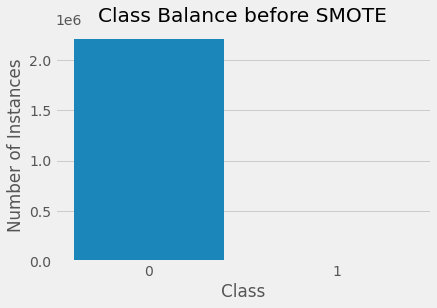

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count the number of occurrences of each class
counts = y_train.value_counts()

# create a bar plot
sns.barplot(x=counts.index, y=counts)

# set the plot title and labels
plt.title('Class Balance before SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()


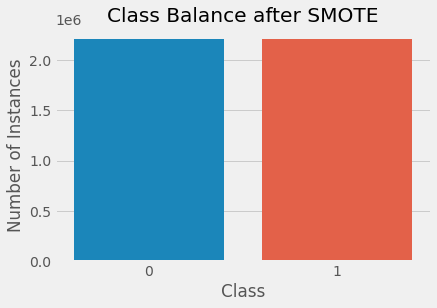

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count the number of occurrences of each class
counts = y_train_re.value_counts()

# create a bar plot
sns.barplot(x=counts.index, y=counts)

# set the plot title and labels
plt.title('Class Balance after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()


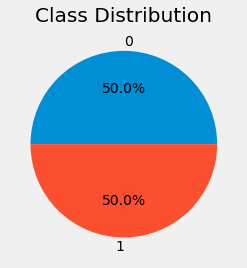

In [ ]:
import matplotlib.pyplot as plt

# Count the number of instances in each class
class_counts = y_train_re.value_counts()

# Plot the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
def model_fit(model,X_train,X_test,y_train,y_test):
    clf_pipe=Pipeline([('clf',model)])
    clf=clf_pipe.fit(X_train,y_train)
    print(clf.score(X_train,y_train))
    print(clf.score(X_test,y_test))
    pickle.dump(clf, open('/content/drive/MyDrive/Colab Notebooks/project 2/etree_model.pkl', 'wb'))
    y_pred=clf_pipe.predict(X_test)
    return y_pred
    

In [ ]:
xgb=XGBClassifier(max_depth=3, n_jobs=4)
y_pred=model_fit(xgb,X_train_re,X_test,y_train_re,y_test)

0.9994789026862646
0.9998646409737187


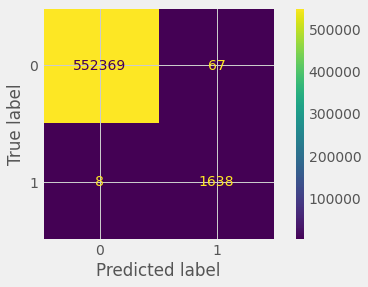

In [ ]:
#xgboost confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
xgbf1=f1_score(y_test,y_pred)
print(xgbf1)

0.9776186213070726


In [ ]:
xgbap=average_precision_score(y_test,y_pred)
print(xgbap)

0.9560489732747394


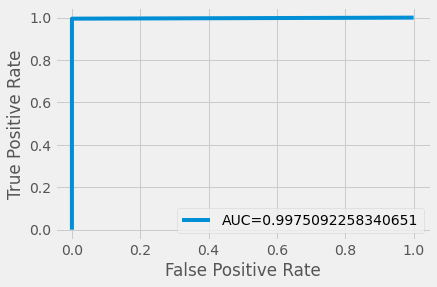

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
rf=RandomForestClassifier()
y_pred=model_fit(rf,X_train_re,X_test,y_train_re,y_test)

0.9998385139760451
0.9999693186207096


In [ ]:
rf1=f1_score(y_test,y_pred)
print(rf1)

0.9948375341633768


In [ ]:
rfap=average_precision_score(y_test,y_pred)
print(rfap)

0.9897162489449026


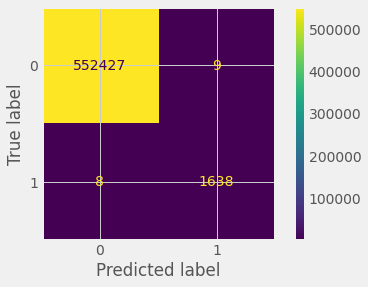

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

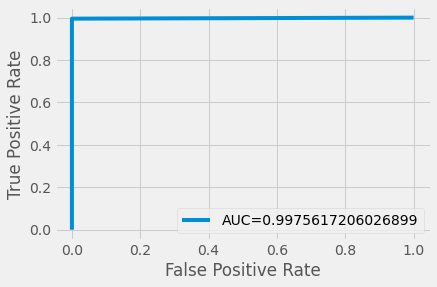

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
rfauc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(rfauc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
y_pred=model_fit(dtree,X_train_re,X_test,y_train_re,y_test)

0.9985004113256063
0.9998808840568725


In [ ]:
df1=f1_score(y_test,y_pred)
print(df1)

0.9802395209580839


In [ ]:
dap=average_precision_score(y_test,y_pred)
print(dap)

0.9610842538308286


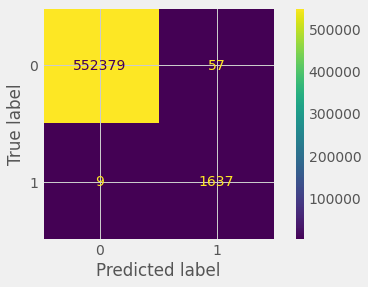

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

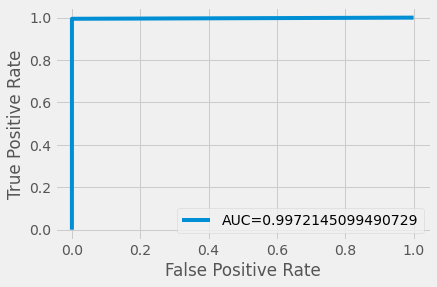

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
dauc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(dauc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
etree=ExtraTreesClassifier()
y_pred=model_fit(etree,X_train_re,X_test,y_train_re,y_test)

0.9887254100827167
0.9997365010955057


In [ ]:
ef1=f1_score(y_test,y_pred)
print(ef1)

0.9565992865636147


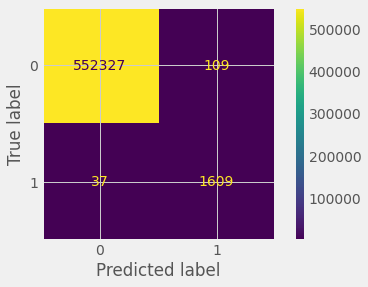

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
eap=average_precision_score(y_test,y_pred)
print(eap)

0.9155683564236068


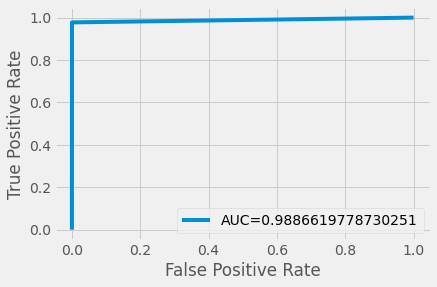

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
eauc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(eauc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

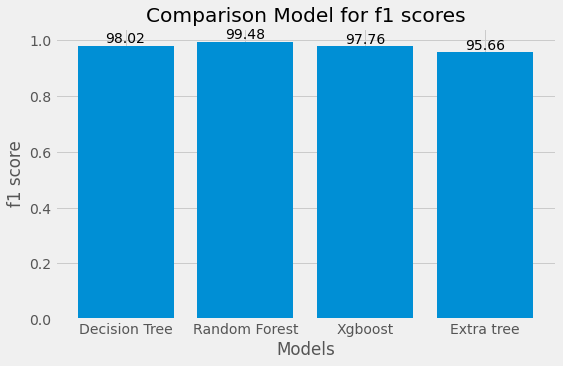

In [ ]:
fig = plt.figure(figsize = (8,5))
x=['Decision Tree', 'Random Forest','Xgboost',"Extra tree"]
y=[df1, rf1,xgbf1,ef1]
plt.bar(x,y)
for i in range(len(x)):
    plt.annotate(str(round(y[i]*100,2)), xy=(x[i], y[i]), ha='center', va='bottom')
plt.title('Comparison Model for f1 scores')
plt.xlabel('Models')
plt.ylabel('f1 score')



plt.show()

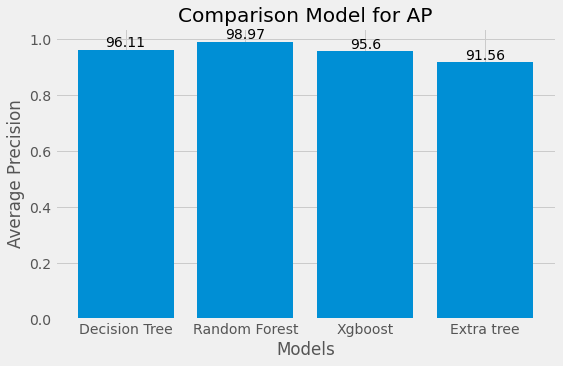

In [ ]:
fig = plt.figure(figsize = (8,5))
x=['Decision Tree', 'Random Forest','Xgboost',"Extra tree"]
y=[dap,rfap,xgbap,eap]
plt.bar(x,y)
for i in range(len(x)):
    plt.annotate(str(round(y[i]*100,2)), xy=(x[i], y[i]), ha='center', va='bottom')
plt.title('Comparison Model for AP')
plt.xlabel('Models')
plt.ylabel('Average Precision')

plt.show()

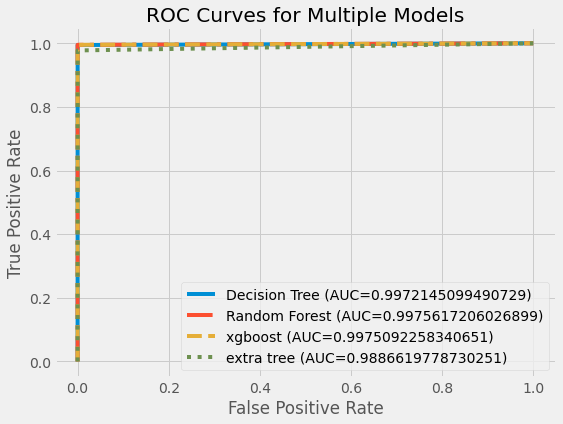

In [ ]:
from sklearn import metrics

models = [("Decision Tree", dtree), ("Random Forest", rf),("xgboost",xgb),("extra tree",etree)]

plt.figure(figsize=(8, 6))
# plt.plot([0, 1], [0, 1], 'k--')

for name, model in models:
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    if name=='xgboost':
      linestyle="--"
    elif name=="Random Forest":
      linestyle="dashdot"
    elif name=="extra tree":
      linestyle=":"
    else:
      linestyle="-"
    plt.plot(fpr, tpr, ls=linestyle,label=name + " (AUC=" + str(auc) + ")")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiple Models")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cl = XGBClassifier(max_depth=3, n_jobs=4)
scores = cross_val_score(cl, X_train_re, y_train_re, cv=5)  # cv is the number of folds

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.99940831 0.99949655 0.9994875  0.99946374 0.99943998]
Mean score: 0.9994592172905655


In [ ]:
from sklearn.model_selection import cross_val_score

crl = RandomForestClassifier()
scores = cross_val_score(crl, X_train_re, y_train_re, cv=5)  # cv is the number of folds

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.99996945 0.99996267 0.99996267 0.99998077 0.99997964]
Mean score: 0.9999710375787417


In [ ]:
from sklearn.model_selection import cross_val_score

cel = ExtraTreesClassifier()
scores = cross_val_score(cel, X_train_re, y_train_re, cv=5)  # cv is the number of folds

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.9998122  0.99988573 0.99986537 0.99988573 0.9998846 ]
Mean score: 0.999866727608428


In [ ]:
from sklearn.model_selection import cross_val_score

dl = DecisionTreeClassifier()
scores = cross_val_score(dl, X_train_re, y_train_re, cv=5)  # cv is the number of folds

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.99987555 0.99985858 0.99988121 0.99988121 0.99989365]
Mean score: 0.9998780410542322


In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hourOfDay,orgBalanceError,destBalanceError
2,1,0,1.809029e+02,1.797510e+02,-0.919657,-4.045176e+00,-1.278814e+00,1,0.00,181.00
3,1,1,1.811661e+02,1.823099e+02,-0.338054,2.118227e+04,-2.615949e-01,1,0.00,-21001.00
15,1,1,2.291346e+05,1.532383e+04,-2.093691,5.080713e+03,5.151371e+04,1,213808.94,275564.38
19,1,0,2.153108e+05,7.045561e+02,1.539082,2.242551e+04,-6.814187e-02,1,214605.30,192885.30
24,1,0,3.116861e+05,1.083564e+04,0.018068,6.263362e+03,2.719173e+06,1,300850.89,3024591.78
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,3.396844e+05,3.396827e+05,-0.343834,-5.722606e-01,3.396812e+05,23,0.00,679364.26
6362616,743,0,6.311410e+06,6.311410e+06,0.412554,-8.480713e-01,-2.338057e-01,23,0.00,6311409.28
6362617,743,1,6.311409e+06,6.311408e+06,0.087576,6.849008e+04,6.379898e+06,23,0.00,12622818.55
6362618,743,0,8.500029e+05,8.500027e+05,0.428276,-4.570214e+00,-1.450421e+00,23,0.00,850002.52


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              int64  
 2   amount            float64
 3   oldbalanceOrg     float64
 4   newbalanceOrig    float64
 5   oldbalanceDest    float64
 6   newbalanceDest    float64
 7   hourOfDay         int64  
 8   orgBalanceError   float64
 9   destBalanceError  float64
dtypes: float64(7), int64(3)
memory usage: 232.5 MB


In [ ]:
clf_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl', 'rb'))

# Create a new DataFrame with the features for the new sample
X_new = pd.DataFrame({'step': [1],
                      'type': [0],
                      'amount': [181.0],
                      'oldbalanceOrg': [181.0],
                      'newbalanceOrig': [0.00],
                      'oldbalanceDest': [0.00],
                      'newbalanceDest': [0.00],
                      'hourOfDay': [1],
                      'orgBalanceError': [0.00],
                      'destBalanceError': [181.0]})

# Use the predict method to get the predicted label
# if 1 then fraud else not fraud
#here output should be 1.
y_pred = clf_model.predict(X_new)

print(y_pred)

[1]


In [ ]:
X_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hourOfDay,orgBalanceError,destBalanceError
0,1,0,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0


In [ ]:
# def add_noise(xdf):
#   columns=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
#   epsilon=1
#   sensitivity=1
#   for col in columns:
#     dp_col = xdf[col].apply(lambda x: Laplace(epsilon=epsilon, sensitivity=sensitivity).randomise(x))
#     xdf[col] = dp_col
#   return xdf
import pickle
import pandas as pd
clf_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl', 'rb'))
# X_new = pd.DataFrame({'step': [1],
#                       'type': [1],
#                       'amount': [229133.94],
#                       'oldbalanceOrg': [15325.00],
#                       'newbalanceOrig': [0.00],
#                       'oldbalanceDest': [5083.00],
#                       'newbalanceDest': [51513.44],
#                       'hourOfDay': [1],
#                       'orgBalanceError': [32349.0],
#                       'destBalanceError': [8854.0]})

X_new = pd.DataFrame({'step': [1],
                      'type': [1],
                      'amount': [1000],
                      'oldbalanceOrg': [15325.00],
                      'newbalanceOrig': [14325.00],
                      'oldbalanceDest': [5083.00],
                      'newbalanceDest': [6083],
                      'hourOfDay': [1],
                      'orgBalanceError': [0.0],
                      'destBalanceError': [0.0]})

# X_new = pd.DataFrame({'step': [1],
#                       'type': [0],
#                       'amount': [181.0],
#                       'oldbalanceOrg': [181.0],
#                       'newbalanceOrig': [0.00],
#                       'oldbalanceDest': [0.00],
#                       'newbalanceDest': [0.00],
#                       'hourOfDay': [1],
#                       'orgBalanceError': [0.00],
#                       'destBalanceError': [181.0]})

# X_new=add_noise(X_new)

y_pred = clf_model.predict(X_new)

print(y_pred)


[0]


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [ ]:
'''from sklearn import metrics

models = [("Decision Tree","/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl"),("xgboost","/content/drive/MyDrive/Colab Notebooks/project 2/xgboost_model.pkl")]

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

for name, model in models:
    with open(model,'rb') as f:
      model = pickle.load(f)
    y_pred = model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    linestyle = "--" if name== 'xgboost' else "-"
    plt.plot(fpr, tpr, linestyle=linestyle,label=name + " (AUC=" + str(auc) + ")")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiple Models")
plt.legend(loc="lower right")
plt.show()'''

'from sklearn import metrics\n\nmodels = [("Decision Tree","/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl"),("xgboost","/content/drive/MyDrive/Colab Notebooks/project 2/xgboost_model.pkl")]\n\nplt.figure(figsize=(8, 6))\nplt.plot([0, 1], [0, 1], \'k--\')\n\nfor name, model in models:\n    with open(model,\'rb\') as f:\n      model = pickle.load(f)\n    y_pred = model.predict(X_test)\n    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)\n    auc = metrics.roc_auc_score(y_test, y_pred)\n    linestyle = "--" if name== \'xgboost\' else "-"\n    plt.plot(fpr, tpr, linestyle=linestyle,label=name + " (AUC=" + str(auc) + ")")\n\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curves for Multiple Models")\nplt.legend(loc="lower right")\nplt.show()'

In [ ]:
'''rom sklearn import metrics
from sklearn.metrics import precision_recall_curve
models = [("Decision Tree","/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl"),("xgboost","/content/drive/MyDrive/Colab Notebooks/project 2/xgboost_model.pkl")]

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

for name, model in models:
    with open(model,'rb') as f:
      model = pickle.load(f)
    y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=name)

# Set the plot labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Multiple Models")

# Set the legend location and show the plot
plt.legend(loc="lower left")
plt.show()'''







'rom sklearn import metrics\nfrom sklearn.metrics import precision_recall_curve\nmodels = [("Decision Tree","/content/drive/MyDrive/Colab Notebooks/project 2/model.pkl"),("xgboost","/content/drive/MyDrive/Colab Notebooks/project 2/xgboost_model.pkl")]\n\nplt.figure(figsize=(8, 6))\nplt.plot([0, 1], [0, 1], \'k--\')\n\nfor name, model in models:\n    with open(model,\'rb\') as f:\n      model = pickle.load(f)\n    y_pred = model.predict(X_test)\n    precision, recall, _ = precision_recall_curve(y_test, y_pred)\n    plt.plot(recall, precision, label=name)\n\n# Set the plot labels and title\nplt.xlabel("Recall")\nplt.ylabel("Precision")\nplt.title("Precision-Recall Curves for Multiple Models")\n\n# Set the legend location and show the plot\nplt.legend(loc="lower left")\nplt.show()'